
The Traveling Salesman Problem (TSP) is a classic combinatorial optimization problem in the field of operations research and computer science. The problem can be stated as follows:

Given a set of cities and the distances between each pair of cities, the objective is to find the shortest possible route that visits each city exactly once and returns to the original city (the starting point).

Mathematically, the TSP can be formulated as a minimization problem, where the objective function is to minimize the total distance traveled:

$ [
\min \sum_{(i, j) \in E} c_{ij} \cdot x_{ij}
]$

Subject to the following constraints:

1. Each city must be visited exactly once: $[
\sum_{j \neq i} x_{ij} = 1 \quad \text{for } i = 1, 2, ..., n
]$

2. Each city must be left exactly once:
$[
\sum_{i \neq j} x_{ij} = 1 \quad \text{for } j = 1, 2, ..., n
]$

3. Subtour elimination constraints: These are additional constraints that prevent the solution from containing any subtours, meaning that the salesman doesn't get stuck in a loop visiting a subset of cities.

In the above formulation:
      $c_{ij}$ represents the distance between city $\( i \)$ and city \( j \)$.
    $x_{ij}$ is a binary decision variable, where $x_{ij}$ = 1$ if the route goes from city $\( i \)$ to city $\( j \)$, and $\( x_{ij}$ = 0 $\) otherwise.
    $( E \) is the set of edges representing possible routes between cities.
    \item \( n \) is the total number of cities.

The TSP is known to be NP-hard, meaning that no efficient algorithm is known to solve all instances of the problem optimally in polynomial time. However, various heuristic and approximation algorithms have been developed to find near-optimal solutions for practical instances of the problem. The TSP has applications in various fields, including logistics, transportation, manufacturing, and telecommunications.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tsp_data = pd.read_csv('TSP11.csv', header=None)

tsp_matrix = tsp_data.to_numpy()

tsp_matrix


array([[  0,  29,  20,  21,  16,  31, 100,  12,   4,  31,  18],
       [ 29,   0,  15,  29,  28,  40,  72,  21,  29,  41,  12],
       [ 20,  15,   0,  15,  14,  25,  81,   9,  23,  27,  13],
       [ 21,  29,  15,   0,   4,  12,  92,  12,  25,  13,  25],
       [ 16,  28,  14,   4,   0,  16,  94,   9,  20,  16,  22],
       [ 31,  40,  25,  12,  16,   0,  95,  24,  36,   3,  37],
       [100,  72,  81,  92,  94,  95,   0,  90, 101,  99,  84],
       [ 12,  21,   9,  12,   9,  24,  90,   0,  15,  25,  13],
       [  4,  29,  23,  25,  20,  36, 101,  15,   0,  35,  18],
       [ 31,  41,  27,  13,  16,   3,  99,  25,  35,   0,  38],
       [ 18,  12,  13,  25,  22,  37,  84,  13,  18,  38,   0]])

In [ ]:
def calculate_total_cost(sequence, tsp_matrix):
    total_cost = 0

    for i in range(len(sequence) - 1):
        total_cost += tsp_matrix[sequence[i], sequence[i + 1]]

    total_cost += tsp_matrix[sequence[0], sequence[-1]]

    return total_cost


In [ ]:
def generate_neighbour(sequence):
    new_sequence = sequence.copy()
    i,j=np.random.choice(np.arange(len(sequence)),2)
    new_sequence[i],new_sequence[j]=new_sequence[j],new_sequence[i]
    return new_sequence


In [ ]:
import numpy as np

def acceptance_probability(old_cost, new_cost, temperature):
    probability = np.exp((old_cost - new_cost) / temperature)
    return probability


In [ ]:
def simulated_annealing(tsp_matrix):
  sequence=list(range(tsp_matrix.shape[0]))    #initial guess (part 2.3)
  np.random.shuffle(sequence)
  Tk=20
  alpha=0.95
  max_iter=100000
  best_cost=np.inf
  best_sequence=sequence

  total_cost=[]
  for i in range(max_iter):
    old_cost=calculate_total_cost(sequence,tsp_matrix)

    total_cost.append(old_cost)
    if old_cost<best_cost:
      best_cost=old_cost
      best_sequence=sequence

    sequence_new=generate_neighbour(sequence)
    new_cost=calculate_total_cost(sequence_new,tsp_matrix)
    if new_cost<=old_cost:
      sequence = sequence_new

    else:
      prob = acceptance_probability(old_cost,new_cost,Tk)
      sequence = eval(np.random.choice(['sequence_new','sequence'],p=[prob,1-prob]))

    Tk=alpha*Tk
  print()
  print('Best (minimum possible) cost:', best_cost)
  print('Best sequence:', best_sequence)

  plt.plot(np.arange(1, max_iter + 1), total_cost, color='red', linewidth=1)
  plt.xlabel('Number of Iterations')
  plt.ylabel('Total Cost')
  plt.title('Cost Function vs Iteration')
  plt.grid(True)
  plt.show()


<ipython-input-39-763f789d2186>:4: RuntimeWarning: overflow encountered in divide
  probability = np.exp((old_cost - new_cost) / temperature)



Best (minimum possible) cost: 253
Best sequence: [9, 3, 4, 7, 0, 8, 10, 1, 6, 2, 5]


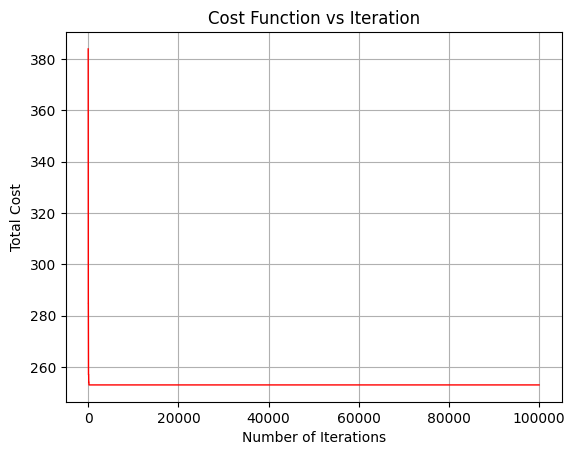

In [ ]:
simulated_annealing(tsp_matrix)

In [ ]:
import math as m
def simulated_annealing(tsp_matrix):
  sequence=list(range(tsp_matrix.shape[0]))    #initial guess (part 2.3)
  np.random.shuffle(sequence)
  Tk0=20
  alpha=0.95
  max_iter=100000
  best_cost=np.inf
  best_sequence=sequence

  total_cost=[]
  for i in range(max_iter):
    old_cost=calculate_total_cost(sequence,tsp_matrix)

    total_cost.append(old_cost)
    if old_cost<best_cost:
      best_cost=old_cost
      best_sequence=sequence

    sequence_new=generate_neighbour(sequence)
    new_cost=calculate_total_cost(sequence_new,tsp_matrix)
    if new_cost<=old_cost:
      sequence = sequence_new

    else:
      prob = acceptance_probability(old_cost,new_cost,Tk)
      sequence = eval(np.random.choice(['sequence_new','sequence'],p=[prob,1-prob]))

    Tk = Tk0 / (1 + np.log(i+1))
  print()
  print('Best (minimum possible) cost:', best_cost)
  print('Best sequence:', best_sequence)

  plt.plot(np.arange(1, max_iter + 1), total_cost, color='red', linewidth=1)
  plt.xlabel('Number of Iterations')
  plt.ylabel('Total Cost')
  plt.title('Cost Function vs Iteration')
  plt.grid(True)
  plt.show()



Best (minimum possible) cost: 256
Best sequence: [0, 8, 10, 1, 6, 2, 7, 5, 9, 3, 4]


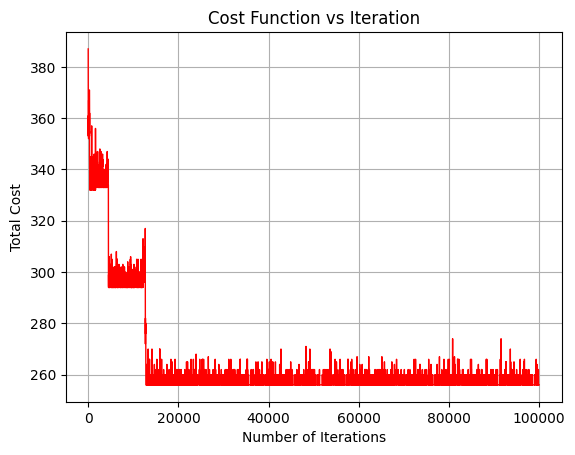

In [ ]:
simulated_annealing(tsp_matrix)

**Comment**:-This cooling schedule reduces the temperature more gradually as the number of iterations increases. Initially, the temperature decreases rapidly, but as the algorithm progresses, the rate of decrease slows down.

Compared to the typical exponential cooling schedule, the logarithmic cooling schedule may lead to slower convergence but can potentially help the algorithm explore the solution space more thoroughly. This may result in finding better quality solutions, especially for complex optimization problems where there are many local optima.

In [ ]:
df=pd.read_csv('TSP48.csv',header=None)
matrix=df.to_numpy()

<ipython-input-18-763f789d2186>:4: RuntimeWarning: overflow encountered in divide
  probability = np.exp((old_cost - new_cost) / temperature)



Best (minimum possible) cost: 118816
Best sequence: [34, 26, 37, 3, 38, 45, 28, 25, 44, 12, 10, 14, 16, 6, 43, 21, 40, 4, 19, 35, 17, 29, 42, 46, 2, 27, 11, 22, 33, 1, 41, 31, 20, 5, 30, 7, 9, 18, 36, 32, 39, 15, 23, 24, 8, 0, 13, 47]


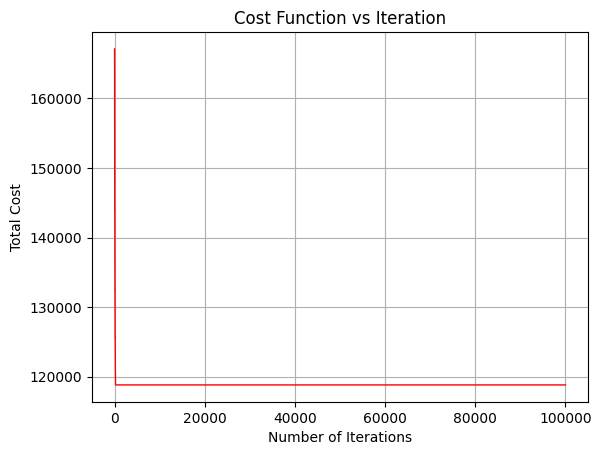

In [ ]:
simulated_annealing(matrix)